In [5]:
import numpy as np 
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from display_network import *

%matplotlib inline

In [6]:
# Load MNIST dataset
from mlxtend.data import loadlocal_mnist

X, y = loadlocal_mnist(
images_path='../MNIST/t10k-images.idx3-ubyte',
labels_path='../MNIST/t10k-labels.idx1-ubyte')

# Train model
K = 10
kmeans = KMeans(n_clusters=K).fit(X)

# Make predictions
pred_label = kmeans.predict(X)

<class 'numpy.ndarray'>
(784, 10)


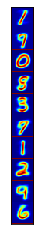

In [8]:
# Print out the center of each cluster

print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')


# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
#image = cmap(norm(A))

In [9]:
# Show 20 closest pics to each center

from sklearn.neighbors import NearestNeighbors

N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X[pred_label == k, :]

    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(N0).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

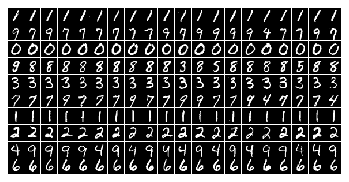

In [10]:
plt.axis('off')
A = display_network(X1.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

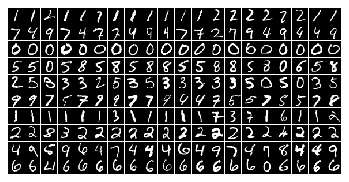

In [11]:
# Show 20 random pics of each cluster

plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()